## Demo of Astronomical Interactive Data Analysis Techniques using IPython/Jupyter Notebooks and Ginga

This notebook shows examples of using an interactive Ginga viewer running in an HTML5 canvas with an IPython Notebook.  You do not need a special widget set to run this, just an HTML5 compliant browser.

See NOTES at end for more info installation/requirements.

If you want to play with this stuff, download this notebook
by the link in the upper RH corner.  Save it with an "ipynb"
extension.

There are two example FITS files used in this document.
You can get them [here](https://docs.google.com/file/d/0B6XTrKRuqwwKclUwTmxJbGlBTlU/edit?usp=sharing)
and [here](https://docs.google.com/file/d/0B6XTrKRuqwwKLXNtMjJUTmZBZ3M/edit?usp=sharing).
Put them in the same directory where you downloaded the notebook.

In [1]:
# Requirements:
from ginga.version import version
version

# Get ginga from github (https://github.com/ejeschke/ginga) or
#   pypi (https://pypi.python.org/pypi/ginga)
# Ginga documentation at: http://ginga.readthedocs.org/en/latest/

'2.5.20160322122203'

In [3]:
# setup
from ginga.web.pgw import ipg
# Set this to True if you have a non-buggy python OpenCv bindings--it greatly speeds up some operations
use_opencv = False

server = ipg.make_server(host='localhost', port=9914, use_opencv=use_opencv)

In [4]:
# Start viewer server
# IMPORTANT: if running in an IPython/Jupyter notebook, use the no_ioloop=True option
server.start(no_ioloop=True)

In [5]:
# Get a viewer
# This will get a handle to the viewer v1 = server.get_viewer('v1')
v1 = server.get_viewer('v1')

In [6]:
# where is my viewer
v1.url

'http://localhost:9914/app?id=v1'

NOTE: *open the link that was printed in the cell above in a new window* to get the viewer.  
You can open as many of these viewers as you want--just keep a handle to it and use a different name for each unique one.

Keyboard/mouse bindings in the viewer window: http://ginga.readthedocs.org/en/latest/quickref.html

In [7]:
# Load an image into the viewer
# (change the path to where you downloaded the sample images, or use your own)
v1.load('camera.fits')

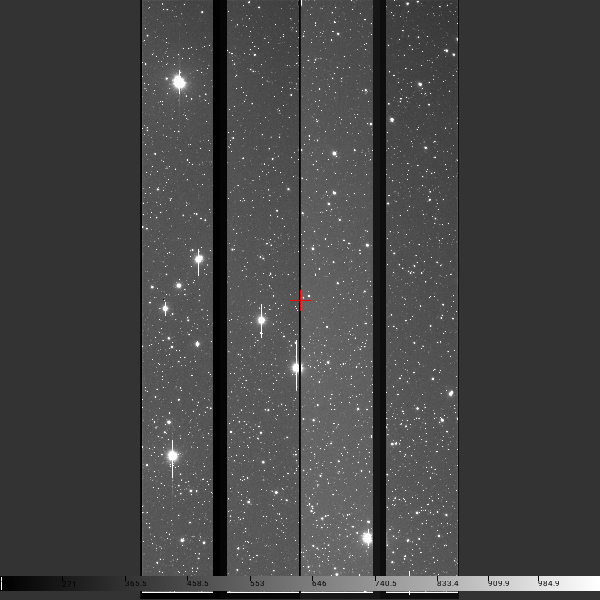

In [8]:
# Capture the viewer screen
v1.show()

Now set a pan position by shift-clicking somewhere in the *viewer* window.

In [9]:
# Let's get the pan position we just set
dx, dy = v1.get_pan()
dx, dy

(1370.96, 2741.7)

In [10]:
# Getting values from the FITS header is also easy
img = v1.get_image()
hdr =img.get_header()
hdr['OBJECT']

'M27'

In [11]:
# What are the coordinates of the pan position?
# This uses astropy.wcs under the hood if you have it installed
img.pixtoradec(dx, dy)

(299.6432661914551, 22.843428453228956)

In [12]:
# Set cut level algorithm to use
v1.set_autocut_params('zscale', contrast=0.25)
# Auto cut levels on the image
v1.auto_levels()

In [13]:
# Let's do an example of the two-way interactivity
# First, let's add a drawing canvas
canvas = v1.add_canvas()

In [14]:
# delete all objects on the canvas
canvas.delete_all_objects()
# set the drawing parameters
canvas.set_drawtype('point', color='orange')

Now, in the Ginga window, draw a point using the right mouse button (if you only have one mouse button (e.g. Mac) press and release spacebar, then click and drag)

In [15]:
# get the pixel coordinates of the point we just drew
p = canvas.objects[0]
p.x, p.y

(1407.246484081285, 3025.3943300900464)

In [16]:
# Get the RA/DEC in degrees of the point
img.pixtoradec(p.x, p.y)

(299.6410248019017, 22.859342430450003)

In [17]:
# Get RA/DEC in H M S sign D M S
img.pixtoradec(p.x, p.y, format='hms')

(19, 58, 33.845952456413215, 1, 22, 51, 33.632749620010145)

In [18]:
# Get RA/DEC in classical string notation
img.pixtoradec(p.x, p.y, format='str')

('19:58:33.846', '+22:51:33.63')

In [19]:
# Verify we have a valid coordinate system defined
img.wcs.coordsys

'fk5'

In [20]:
# Get viewer model holding data
image = v1.get_image()
image.get_minmax()

(170, 65535)

In [21]:
# get viewer data
data_np = image.get_data()
import numpy as np
np.mean(data_np)

585.40388180946195

In [22]:
# Set viewer cut levels
v1.cut_levels(170, 2000)

In [23]:
# set a color map on the viewer 
v1.set_color_map('rainbow3')

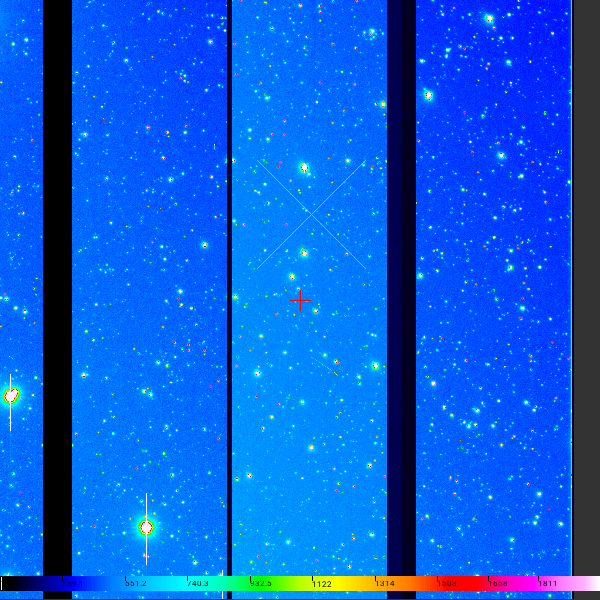

In [24]:
# Image will appear in this output
v1.show()

In [23]:
# Set color distribution algorithm
# choices: linear, log, power, sqrt, squared, asinh, sinh, histeq, 
v1.set_color_algorithm('linear')

In [25]:
# Example of setting another draw type.
canvas.delete_all_objects()
canvas.set_drawtype('rectangle')

Now right-drag to draw a *small* rectangle in the Ginga image.
Remember: On a single button pointing device, press and release spacebar, then click and drag.

Try to include some objects. 


In [26]:
# Find approximate bright peaks in a sub-area
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

img = v1.get_image()
r = canvas.objects[0]
data = img.cutout_shape(r)
peaks = iq.find_bright_peaks(data)
peaks[:20]

[(56.0, 2.0),
 (77.0, 8.0),
 (118.0, 14.0),
 (50.0, 19.0),
 (186.0, 36.0),
 (75.0, 41.0),
 (197.0, 43.0),
 (204.0, 50.0),
 (15.0, 59.0),
 (61.0, 72.0),
 (192.0, 74.0),
 (231.0, 77.0),
 (63.0, 79.0),
 (26.0, 83.0),
 (157.0, 86.0),
 (205.0, 105.0),
 (59.0, 110.0),
 (126.0, 110.0),
 (194.0, 111.0),
 (154.0, 112.0)]

In [27]:
# evaluate peaks to get FWHM, center of each peak, etc.
objs = iq.evaluate_peaks(peaks, data)
# how many did we find with standard thresholding, etc.
# see params for find_bright_peaks() and evaluate_peaks() for details
len(objs)

/Users/eric/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


48

In [28]:
# example of what is returned
o1 = objs[0]
o1

{'brightness': 7868.508678558866, 'objy': 2.2682704832590916, 'objx': 55.955900363302305, 'elipse': 0.8211006373740604, 'pos': 0.9396215615061532, 'background': 443.0, 'y': 2, 'x': 56, 'fwhm_y': 2.5535478435201435, 'fwhm_x': 3.1099084902510556, 'fwhm': 2.8453591519245833, 'fwhm_radius': 15, 'skylevel': 505.15000000000003}

In [29]:
# pixel coords are for cutout, so add back in origin of cutout
#  to get full data coords RA, DEC of first object
x1, y1, x2, y2 = r.get_llur()
img.pixtoradec(x1+o1.objx, y1+o1.objy)

(299.6101275717426, 22.84664212014308)

In [30]:
# Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = x1+obj.objx, y1+obj.objy
    if r.contains(x, y):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
v1.set_pan((x1+x2)/2, (y1+y2)/2)
v1.scale_to(0.75, 0.75)

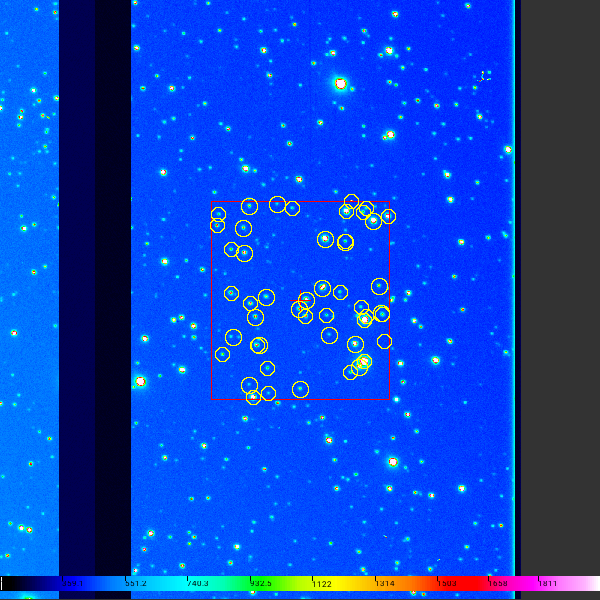

In [31]:
v1.show()

How about some plots...?

In [32]:
# Load an image from a spectrograph at least 1000x1000 (e.g. spectra.fits)
v1.load('spectra.fits')

In [33]:
# swap XY, flip Y, change colormap back to "ramp"
v1.set_color_map('gray')
v1.transform(False, True, True)
v1.auto_levels()

In [34]:
# Programmatically add a line along the figure at designated coordinates
canvas.delete_all_objects()
Line = canvas.get_draw_class('line')
l1 = Line(0, 512, 250, 512)
tag = canvas.add(l1)

In [36]:
# Set the pan position and zoom to 1:1.  Show what we did.

v1.set_pan(125, 512)
v1.scale_to(1.0, 1.0)

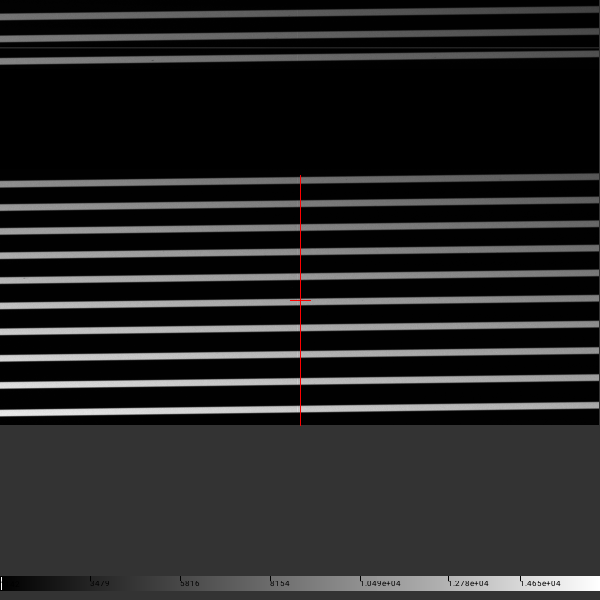

In [37]:
v1.show()

In [38]:
# Get the pixel values along this line
img = v1.get_image()
values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
values[:10]

[1231.0,
 1237.0,
 1220.0,
 1233.0,
 1235.0,
 1229.0,
 1229.0,
 1234.0,
 1228.0,
 1237.0]

/Users/eric/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


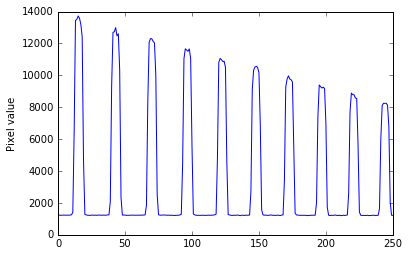

In [39]:
# Plot the 'cuts'
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.cla()
plt.plot(values)
plt.ylabel('Pixel value')

plt.show()

In [40]:
# Plot the cuts that we will draw interactively
canvas.delete_all_objects()
canvas.set_drawtype('line')

Now draw a line through the image (remember to use right mouse btn or else press space bar first)

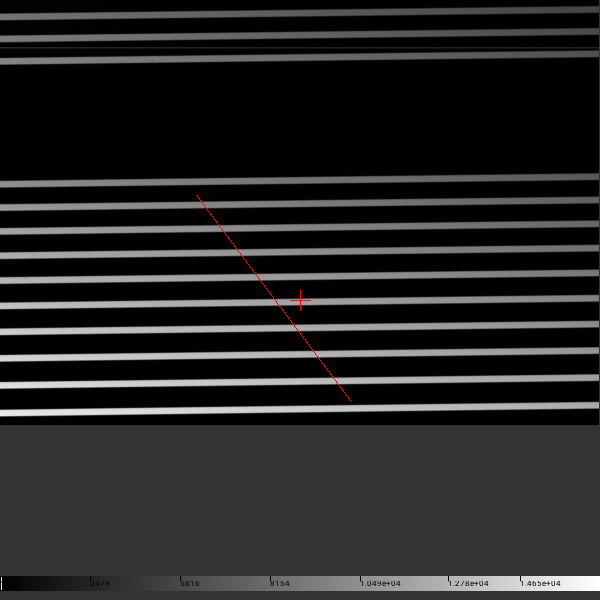

In [40]:
# show our line we drew
v1.show()

In [41]:
def getplot(v1):
    l1 = canvas.objects[0]
    img = v1.get_image()
    values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
    plt.cla()
    
    plt.plot(values)
    plt.ylabel('Pixel value')
    plt.show()

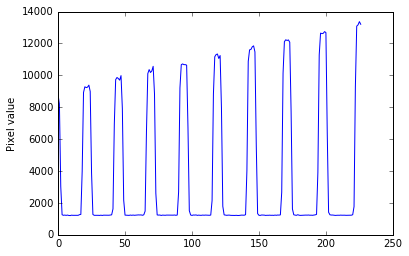

In [42]:
getplot(v1)

Th-th-th-that's all folks!

NOTES:

- this example assumes that you have a working recent version of ipython w/notebook feature
- tested on Linux and Mac
- for drawing, you will need either the [aggdraw module](https://github.com/ejeschke/aggdraw), OpenCv module, or PIL.  PIL is included in anaconda.

Latest Ginga documentation, including detailed installation instructions, can be found [here](http://ginga.readthedocs.org/en/latest/).